In [68]:
import pandas as pd

stock_df = pd.read_csv("../WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv("../df_merged.csv")
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
df["TotalCharges"].describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [12]:
#stock dataset's TotalCharges was object
stock_df["TotalCharges"] = pd.to_numeric(stock_df["TotalCharges"], errors='coerce')
# stock_df["TotalCharges"].isna().sum()

In [63]:
df["TotalCharges"].describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


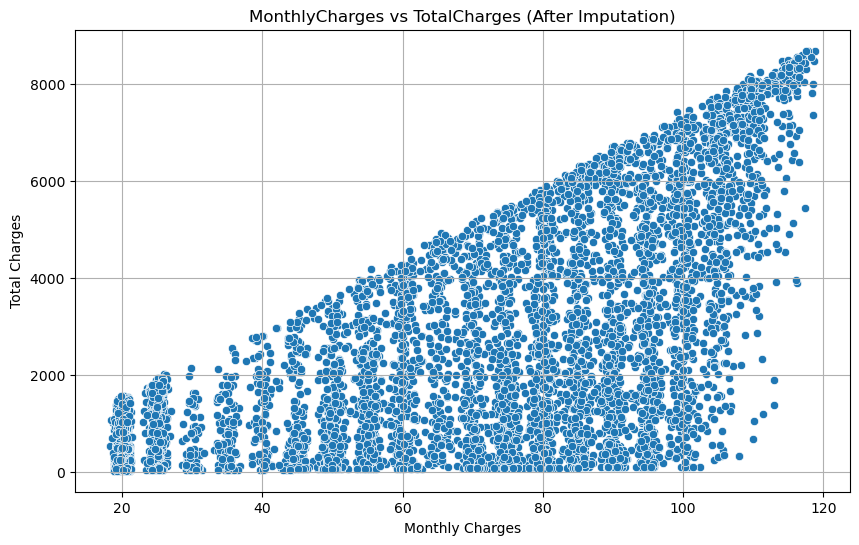

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('MonthlyCharges vs TotalCharges (After Imputation)')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)

plt.savefig("Monthly_vs_TotalCharges.png", dpi=300, bbox_inches='tight')

plt.show()
#strong positive correlation.)left -> right plot)

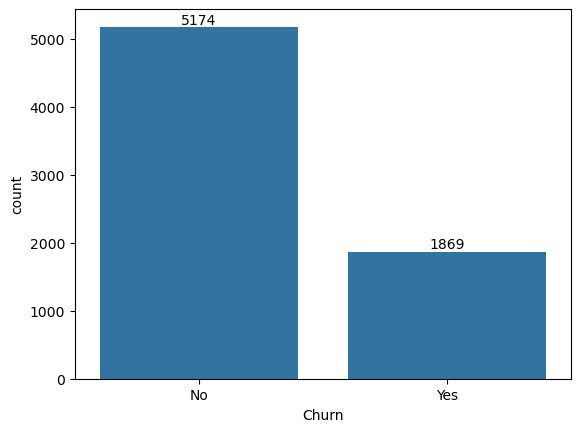

In [59]:
sns.countplot(x="Churn", data=df)

# Add counts on top of bars
for i, count in enumerate(df['Churn'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.savefig("ChurnValueCount.png", dpi=300, bbox_inches='tight')

plt.show()
#Imbalacned DataSet 

## Q/ How do numeric features like tenure, MonthlyCharges, and TotalCharges differ between churners and non-churners?

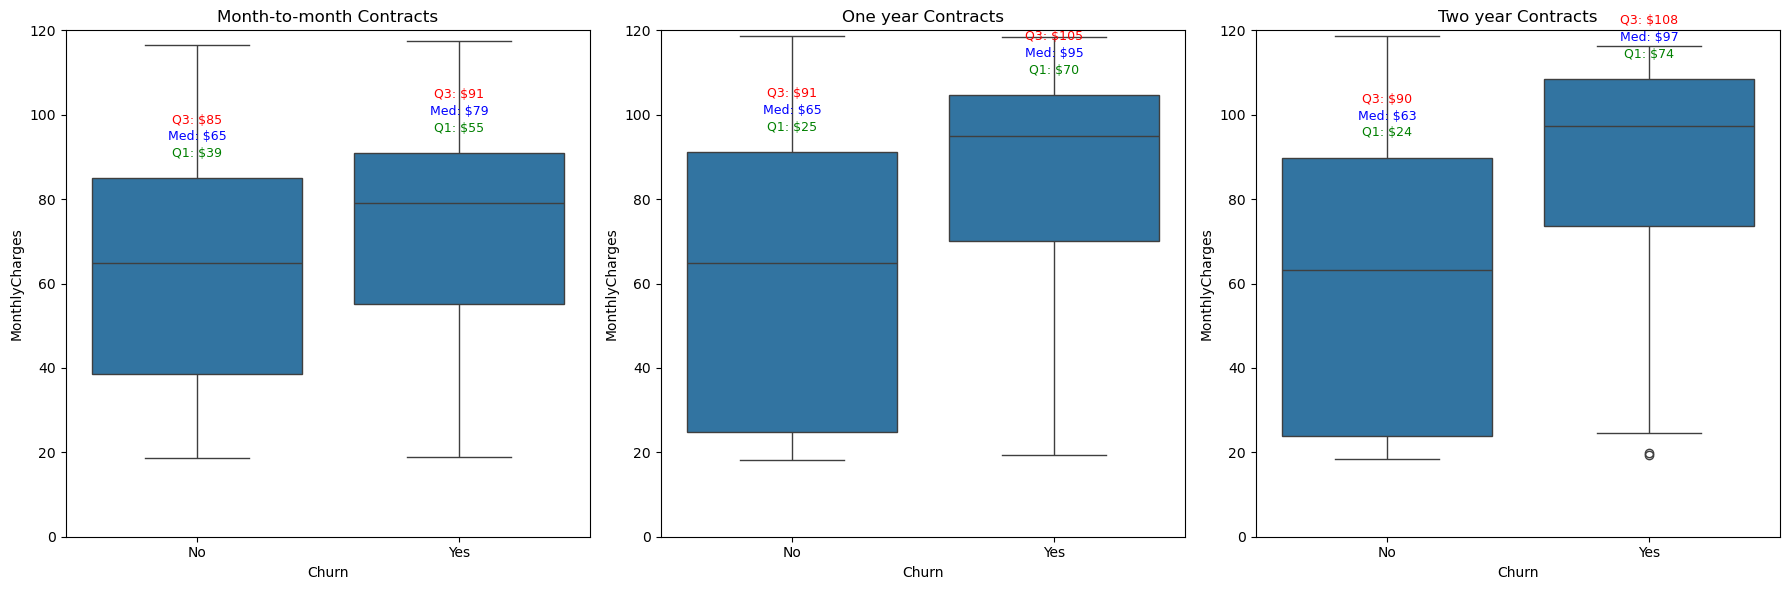

In [97]:
# Create separate boxplots for each contract type with annotations
plt.figure(figsize=(18, 6))

contract_types = ['Month-to-month', 'One year', 'Two year']

for i, contract in enumerate(contract_types):
    plt.subplot(1, 3, i+1)
    contract_data = df[df['Contract'] == contract]
    sns.boxplot(x='Churn', y='MonthlyCharges', data=contract_data)
    plt.title(f'{contract} Contracts')
    plt.ylim(0, 120)
    
    # Add Q1, Q2, Q3 annotations on the plot
    for j, churn in enumerate(['No', 'Yes']):
        data = contract_data[contract_data['Churn'] == churn]['MonthlyCharges']
        q1 = data.quantile(0.25)
        median = data.median()
        q3 = data.quantile(0.75)
        
        # Position text above each box
        y_pos = q3 + 5  # Just above the top of the box
        
        # Add text annotations
        plt.text(j, y_pos + 8, f'Q3: ${q3:.0f}', ha='center', fontsize=9, color='red')
        plt.text(j, y_pos + 4, f'Med: ${median:.0f}', ha='center', fontsize=9, color='blue')
        plt.text(j, y_pos, f'Q1: ${q1:.0f}', ha='center', fontsize=9, color='green')

plt.tight_layout()
plt.savefig("Churn_by_Contract.png", dpi=300, bbox_inches='tight')
plt.show()

## Month to Month Contract Summary
### Not Churned (loyal Customers)
- Q1 shows (39 $), 25% pay less than $39
- Q2 shows (65 $), 50% pay less than $65
- Q3 shows (85 $), 75% pay less than $85
### Churned
- Q1 shows (55 $), 25% pay less than $55
- Q2 shows (79 $), 50% pay less than $79
- Q3 shows (91 $), 75% pay less than $91
## Comparision from Churned & Not Churned
- 55 - 39 = 16$
- 79 - 65 = 14$
- 91 - 85 = 6$

- Even the cheapest 25% of churners (Q1=$55) pay more than 50% of loyal customers (Median=$65)